In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
import numpy as np
import matplotlib.pyplot as plt
import phytools

from quadrantphotodiode import quadrantphotodiode

In [2]:
qpd = quadrantphotodiode.QPD(size=5e-3, gap=40e-6, shape='circular')

In [3]:
x, y = np.meshgrid(qpd.detector_x, qpd.detector_y)
qpd.laser_intensity = phytools.functions.gaussian2d(x=x, y=y, a=1, x0=0, y0=0, fwhm_x=1e-3, fwhm_y=2e-3, offset=0)

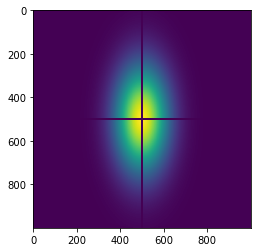

In [4]:
plt.imshow(qpd.detector_intensity)

In [5]:
q1, q2, q3, q4 = qpd.quadrants

In [6]:
qpd.quadrants

[21428.43862841223, 21428.539880328237, 21428.646678693774, 21428.747931591217]

In [7]:
qpd.x_pos

-1.1450114315123309e-11

In [12]:
np.shape(np.zeros((1000,1000)))

(1000, 1000)

In [12]:
diameter = 5e-3
gap = 40e-6
n = 1000
roundoff = 1e-14
    
# The maximum possible gap size is sqrt(2)*Radius of detector;
# raise an exception if this condition is violated:
if gap >= np.sqrt(2) * diameter/2:
    raise Exception('The gap is too large!')

delta = diameter / n
y, x = np.mgrid[-diameter / 2 + delta / 2: diameter / 2 + delta / 2: delta,
                -diameter / 2 + delta / 2: diameter / 2 + delta / 2: delta]
# This computes the distance of each grid point from the origin
# and then we extract a masked array of points where r_sqr is less
# than the distance of each grid point from the origin:
r_sqr = x ** 2 + y ** 2

inside = np.ma.getmask(np.ma.masked_where(r_sqr <= (diameter / 2) ** 2, x))

# This portion takes care of masking out elements of the detector where
# the gap exists. It returns an array of light intensity over the detector.

all_dead = (np.abs(x) + delta / 2 - roundoff > gap / 2) \
    & (np.abs(y) + delta / 2 - roundoff > gap / 2)

partial_dead_x_only = (np.abs(x) + delta / 2 - roundoff > gap / 2) & \
                      (np.abs(x) - delta / 2 - roundoff < gap / 2) & \
                      (np.abs(y) - delta / 2 - roundoff > gap / 2)
partial_dead_y_only = (np.abs(y) + delta / 2 - roundoff > gap / 2) & \
                      (np.abs(y) - delta / 2 - roundoff < gap / 2) & \
                      (np.abs(x) - delta / 2 - roundoff > gap / 2)
partial_dead_x_or_y = (1 / delta) * (np.abs(x) + delta / 2 - gap / 2) * partial_dead_x_only + \
                      (1 / delta) * (np.abs(y) + delta / 2 - gap / 2) * partial_dead_y_only

partial_dead_x_and_y = (1 / delta ** 2) * (np.abs(x) + delta / 2 - gap / 2) ** 2 * \
                       (
                        (np.abs(x) + delta / 2 - roundoff > gap / 2) &
                        (np.abs(x) - delta / 2 - roundoff < gap / 2) &
                        (np.abs(y) + delta / 2 - roundoff > gap / 2) &
                        (np.abs(y) + delta / 2 - roundoff > gap / 2) &
                        (np.abs(y) - delta / 2 - roundoff < gap / 2) &
                        (np.abs(x) + delta / 2 - roundoff > gap / 2)
                       )

gap_mask = all_dead  # not strictly needed, but
partial_mask = partial_dead_x_or_y + partial_dead_x_and_y
partial_mask[partial_mask == 0] = 1
detector_matrix = inside * gap_mask * partial_mask * delta ** 2

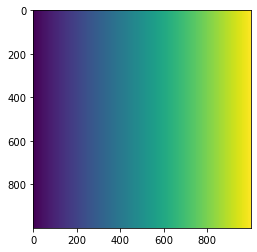

In [39]:
plt.imshow(x)

In [41]:
x[0,:]

array([-2.4975e-03, -2.4925e-03, -2.4875e-03, -2.4825e-03, -2.4775e-03,
       -2.4725e-03, -2.4675e-03, -2.4625e-03, -2.4575e-03, -2.4525e-03,
       -2.4475e-03, -2.4425e-03, -2.4375e-03, -2.4325e-03, -2.4275e-03,
       -2.4225e-03, -2.4175e-03, -2.4125e-03, -2.4075e-03, -2.4025e-03,
       -2.3975e-03, -2.3925e-03, -2.3875e-03, -2.3825e-03, -2.3775e-03,
       -2.3725e-03, -2.3675e-03, -2.3625e-03, -2.3575e-03, -2.3525e-03,
       -2.3475e-03, -2.3425e-03, -2.3375e-03, -2.3325e-03, -2.3275e-03,
       -2.3225e-03, -2.3175e-03, -2.3125e-03, -2.3075e-03, -2.3025e-03,
       -2.2975e-03, -2.2925e-03, -2.2875e-03, -2.2825e-03, -2.2775e-03,
       -2.2725e-03, -2.2675e-03, -2.2625e-03, -2.2575e-03, -2.2525e-03,
       -2.2475e-03, -2.2425e-03, -2.2375e-03, -2.2325e-03, -2.2275e-03,
       -2.2225e-03, -2.2175e-03, -2.2125e-03, -2.2075e-03, -2.2025e-03,
       -2.1975e-03, -2.1925e-03, -2.1875e-03, -2.1825e-03, -2.1775e-03,
       -2.1725e-03, -2.1675e-03, -2.1625e-03, -2.1575e-03, -2.15

In [42]:
y[:,0]

array([-2.4975e-03, -2.4925e-03, -2.4875e-03, -2.4825e-03, -2.4775e-03,
       -2.4725e-03, -2.4675e-03, -2.4625e-03, -2.4575e-03, -2.4525e-03,
       -2.4475e-03, -2.4425e-03, -2.4375e-03, -2.4325e-03, -2.4275e-03,
       -2.4225e-03, -2.4175e-03, -2.4125e-03, -2.4075e-03, -2.4025e-03,
       -2.3975e-03, -2.3925e-03, -2.3875e-03, -2.3825e-03, -2.3775e-03,
       -2.3725e-03, -2.3675e-03, -2.3625e-03, -2.3575e-03, -2.3525e-03,
       -2.3475e-03, -2.3425e-03, -2.3375e-03, -2.3325e-03, -2.3275e-03,
       -2.3225e-03, -2.3175e-03, -2.3125e-03, -2.3075e-03, -2.3025e-03,
       -2.2975e-03, -2.2925e-03, -2.2875e-03, -2.2825e-03, -2.2775e-03,
       -2.2725e-03, -2.2675e-03, -2.2625e-03, -2.2575e-03, -2.2525e-03,
       -2.2475e-03, -2.2425e-03, -2.2375e-03, -2.2325e-03, -2.2275e-03,
       -2.2225e-03, -2.2175e-03, -2.2125e-03, -2.2075e-03, -2.2025e-03,
       -2.1975e-03, -2.1925e-03, -2.1875e-03, -2.1825e-03, -2.1775e-03,
       -2.1725e-03, -2.1675e-03, -2.1625e-03, -2.1575e-03, -2.15

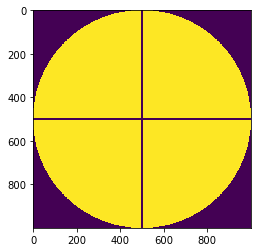

In [36]:
plt.imshow((all_dead*inside).astype(int))

In [34]:
all_dead.astype(int)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])